## ...

![](K-Means-Clustering-Gif.gif)

### Suitable Cases to Use this Technique [ref](http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm)

* With a large number of variables, K-Means may be computationally faster than hierarchical clustering (if K is small).
* K-Means may produce tighter clusters than hierarchical clustering, especially if the clusters are globular.
* Can identify clusters with few members

### Unsuitable Reasons to Use this Technique

* time complexity, NP hard problem
* repeatilibility
    * order will change
    * trapped in local optimization
    * sensitive to initial conditions
* data dependences
    * it assumes equal weight, never know the true attribute
    * not robust to outliers, very far points
    * __the number of cluster must be determined__
    * __data is isotropic__
    * __different clusters have comparable variance__


### Demonstration of k-means assumptions

[Source](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py)

This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.


### The original plot
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png)

* first impression
    * fig 1: k-means assumptions include incorrect number of blobs?
    * fig 2: anisotropicly distributed blobs, okay, k-means cannot work with anisotropic data
    * fig 3: right, data with unequal variance doesn't work well
    * fig 4: unevenly sized bolbs, wait, nothing's wrong?! WHAT?!
    
read the description, know that k-means will produce unexpected clusters... 
demo on 4 kinds of data

* okay, so what?

first 3 not good use, 4 is fine

It is a bit of confusing

* well, what's the purpose here

objective/motivation: try to demo the k-means assumptions for data

* how to achieve that?

A better title: clear, attractive?

the plots:

1. conclusion should be obvious, purpose
    1. title: color, cross, itali
    1. sign?
    1. layout?
2. color: less distractive
3. what to show
    3. density? -> feature of k-means algorithm: no overlapping
    3. distance? -> clustering, not for prediction
    3. ticks? no use

* the title

> `the untold assumptions about k-means`   

> `when to use k-means: the 'hidden' assumptions`  

> `don't use k-means, before you know ...`  

> `who touched my data? the story about k-means`  

> `101 things you need to know about k-means`  

> ...

### Demonstration of k-means assumptions for Data

This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. 

To fully taking advantage of k-means, the data should have the following properties,

* Reasonable N-cluster: CV
* Data is isotropic
* Different clusters have comparable variance

It is not necessary that 

* Almost evenly sized groups.


Populating the interactive namespace from numpy and matplotlib
Automatically created module for IPython interactive environment


/Users/domi/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


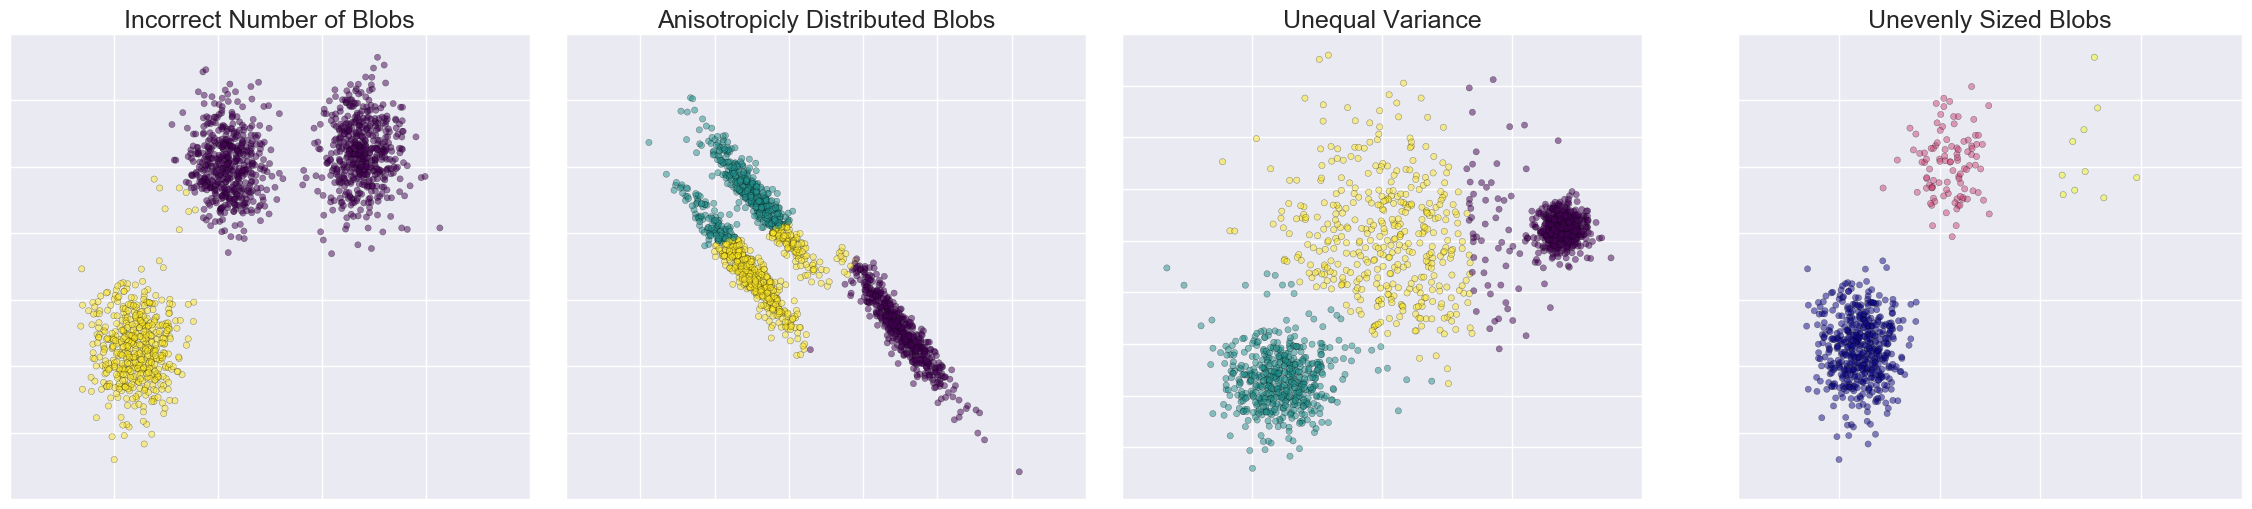

In [198]:
%pylab inline
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


plt.figure(figsize=(24, 6),dpi=400)

alpha=0.5
s=20
fontsize=18

sns.set_style('darkgrid')

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

gs1 = gridspec.GridSpec(1,3)
gs1.update(left=0.05, right=0.73, wspace=0.07)

cell1 =  gs1[0]
cell2 =  gs1[1]
cell3 =  gs1[2]
ax1 = plt.subplot(cell1)
ax2 = plt.subplot(cell2)
ax3 = plt.subplot(cell3)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

# ax=plt.subplot(221)
ax1.scatter(X[:, 0], X[:, 1], c=y_pred,cmap='viridis',alpha=alpha,s=s)
ax1.set_title("Incorrect Number of Blobs",fontsize=fontsize)
ax1.grid(True)
ax1.set_xticklabels([])
ax1.set_yticklabels([])


# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

# ax=plt.subplot(222)
ax2.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,cmap='viridis',alpha=alpha,s=s)
ax2.set_title("Anisotropicly Distributed Blobs", fontsize=fontsize)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

# ax=plt.subplot(223)
ax3.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred,cmap='viridis',alpha=alpha,s=s)
ax3.set_title("Unequal Variance", fontsize=fontsize)
ax3.grid(True)
ax3.set_xticklabels([])
ax3.set_yticklabels([])



gs2 = gridspec.GridSpec(1, 1)
gs2.update(left=0.77, right=0.98) #, hspace=0.05)    

ax4 = plt.subplot(gs2[0])

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

# ax=plt.subplot(224)
ax4.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred,cmap='plasma',alpha=alpha, s=s)
ax4.set_title("Unevenly Sized Blobs", fontsize=fontsize)
ax4.grid(True)
ax4.set_xticklabels([])
ax4.set_yticklabels([])

plt.show()